In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import mglearn

In [52]:
#Data Frame for forge data
X,y = mglearn.datasets.make_forge();
forgeDF = pd.DataFrame(X,columns=['x','y']);
forgeDF['label'] = y;
forgeDF.style.hide_index()

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


x,y,label
9.96347,4.59677,1
11.033,-0.168167,0
11.5416,5.21116,1
8.69289,1.54322,0
8.10623,4.28696,0
8.30989,4.80624,1
11.9303,4.64866,1
9.67285,-0.202832,0
8.3481,5.13416,1
8.67495,4.47573,1


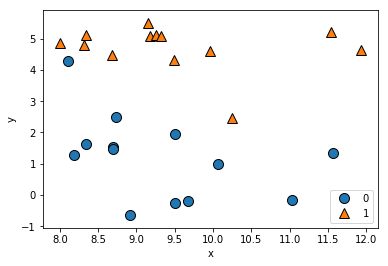

In [50]:
# Discrete chart for forge data
mglearn.discrete_scatter(np.array(forgeDF.x),np.array(forgeDF.y),np.array(forgeDF.label));
plt.legend([0,1],loc=4);
plt.xlabel("x");
plt.ylabel("y");
#mglearn.plots.plot_knn_classification(n_neighbors=5);
#pd.plotting.scatter_matrix(forgeDF,figsize=(15,15)); 

In [87]:
#KNN Classifier
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=7);
neighbour = [1,3,13];
trainingScore = [];
testScore = [];
classifiers = [];

for i in neighbour:
    classifier = KNeighborsClassifier(n_neighbors=i).fit(Xtrain,ytrain);
    classifiers.append(classifier);
    trainingScore.append(classifier.score(Xtrain,ytrain));
    testScore.append(classifier.score(Xtest,ytest))
    
#Overfitting means model complex and tightly coupled with train data
#UnderFitting means model is same and data is redunant or features values are not well define.
neighbourDF = pd.DataFrame(index=["OverFitting","Generalize","UnderFitting"]);
neighbourDF["Neighbour"] = neighbour;
neighbourDF["Training_Score"] = trainingScore;
neighbourDF["Test_Score"] = testScore;
neighbourDF

,Neighbour,Training_Score,Test_Score
OverFitting,1,1.000000,0.714286
Generalize,3,0.947368,0.857143
UnderFitting,13,0.894737,0.857143


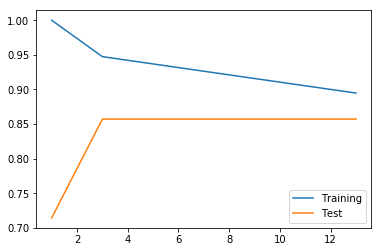

In [92]:
#Graphlical fitting
plt.plot(neighbourDF["Neighbour"],neighbourDF["Training_Score"],label="Training Accuracy");
plt.plot(neighbourDF["Neighbour"],neighbourDF["Test_Score"],label="Test Accuracy");
plt.xlabel = "Neighbour";
plt.ylabel = "Score";
plt.legend(["Training","Test"],loc=4);

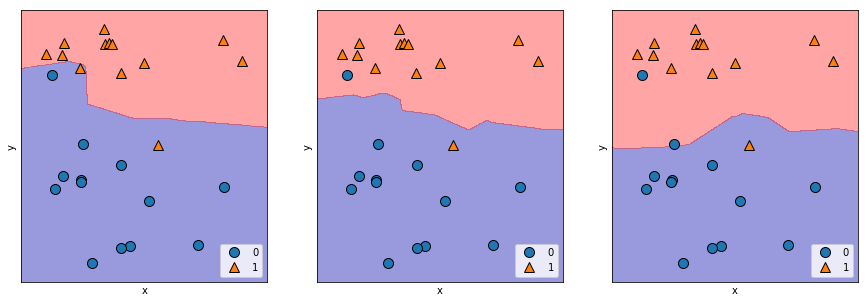

In [85]:
#Decision Boundary
fig, axes = plt.subplots(1,3,figsize=(15,5));
for i in range(0,3):
    mglearn.plots.plot_2d_separator(classifiers[i],X,fill=True,eps=0.5,alpha=0.4,ax = axes[i]);
    mglearn.discrete_scatter(np.array(forgeDF.x),np.array(forgeDF.y),np.array(forgeDF.label),ax = axes[i]);
    axes[i].legend([0,1],loc=4);
    axes[i].set_xlabel("x");
    axes[i].set_ylabel("y");
